<a href="https://colab.research.google.com/github/phurisk/Project_Python/blob/main/%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%95%E0%B8%B1%E0%B9%89%E0%B9%89%E0%B8%872.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ใช้ข้อมูลการเลือกตั้งที่ผ่านมา 14 พค 66 ต่อไปนี้ https://docs.google.com/spreadsheets/d/10E-9vetEyquOYiTWq7TzJ4B7_UnpoK0p/edit?usp=share_link&ouid=115237908096743617902&rtpof=true&sd=true

ตอบคำถามต่อไปนี้และแสดงวิธีหาคำตอบต่อไปนี้


1. หา สส แบบแบ่งเขตและพรรคที่สังกัด ที่ได้รับคะแนนเลือกตั้งมากที่สุด 10 อันดับแรก (20 คะแนน)
2. หา สส แบบแบ่งเขตและพรรคที่สังกัด ที่ได้คะแนนเลือกตั้งน้อยที่สุด N อันดับ โดยที่ N คือเศษที่ได้จากการหาร รหัสนักศึกษา 2 ตัวสุดท้ายด้วย เลข 5 ยกเว้นคนที่เศษเป็น 0 ให้ N=5 ตัวอย่าง เช่น IDxxxxxx13 N =  3 (30 คะแนน)
3. สร้างตารางคะแนนเลือกตั้งแบบบัญชีรายชื่อที่แต่ละพรรคได้เรียงลำดับจากมากไปหาน้อยในแต่ละภาค โดยใช้การแบ่งภูมิภาคตามการเมืองตามข้อมูลต่อไปนี้ https://th.wikipedia.org/wiki/%E0%B8%A0%E0%B8%B9%E0%B8%A1%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%84%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2 (50 คะแนน)

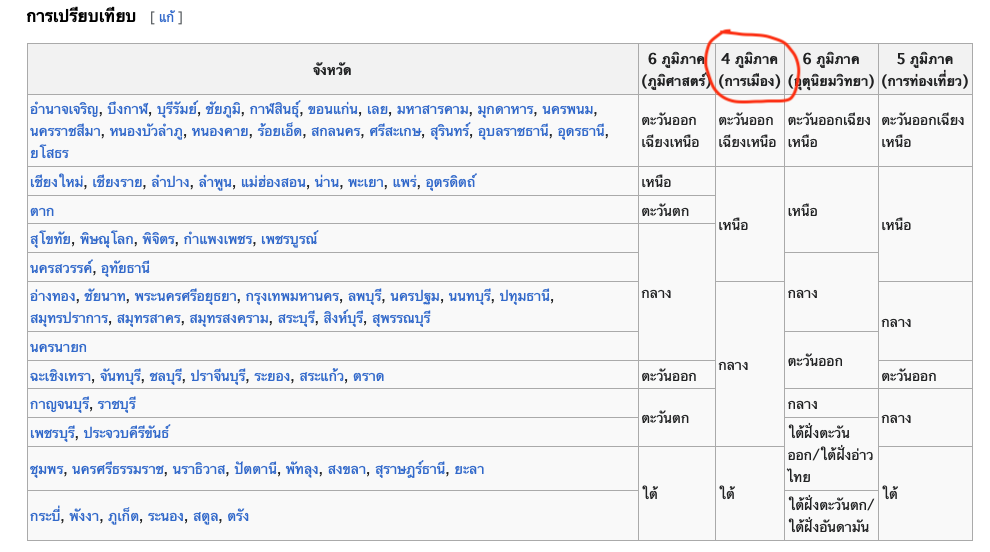

4. สร้างตารางสัดส่วนการเลือกพรรคแบบบัญชีรายชื่อในแต่ละเขต ของพรรค อันดับหนึ่ง/อันดับสอง และเรียงลำดับจากมากไปหาน้อย (ในตารางแสดง ชื่อเขต, ..., ชื่อจังหวัด, ชื่อพรรคอันดับหนึ่ง, ชื่อพรรคอันดับสอง, สัดส่วนคะแนน พรรคอันดับหนึ่ง/คะแนนพรรอันดับสอง)(50 คะแนน)

คะแนนเต็ม 100 คะแนน (โบนัส 50 คะแนน)

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive # เชื่อมบัญชีกับ google drive
drive.mount('/content/drive') # เช็คว่าเชื่อมติดหรือไม่


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. หา สส แบบแบ่งเขตและพรรคที่สังกัด ที่ได้รับคะแนนเลือกตั้งมากที่สุด 10 อันดับแรก (20 คะแนน)

In [ ]:
xls = pd.read_excel'/content/drive/MyDrive/Dataviz2023/ectreport66.xlsx')

In [ ]:
ect_df =pd.read_excel('/content/drive/MyDrive/Dataviz2023/ectreport66.xlsx',sheet_name = 'result_constituencies_Candidate')

In [ ]:
df_p_overview = pd.read_excel('/content/drive/MyDrive/Dataviz2023/ectreport66.xlsx',sheet_name = 'info_party_overview')
df_p_overview



In [ ]:
df_Candidate_Cons = pd.read_excel('/content/drive/MyDrive/Dataviz2023/ectreport66.xlsx',sheet_name = 'Candidate_Constituency')
df_Candidate_Cons



In [ ]:
ect_df['party_name']=ect_df['party_id'].map(df_party_overview.set_index('id')['name'])
ect_df["name"]=ect_df["mp_app_id"].map(df_Candidate_Constituency.set_index('mp_app_id')['mp_app_name'])

df_voter = ect_df[["party_name","name","mp_app_vote"]]

sumery_vote = df_voter.sort_values(by='mp_app_vote',ascending=False).iloc[:10]
sumery_vote.rename(columns ={'mp_app_vote' : 'เสียงที่ได้จำนวน'})

,party_name,name,เสียงที่ได้จำนวน
4301,พลังประชารัฐ,นายทวี สุระบาล,63185
4358,เพื่อไทรวมพลัง,นายสมศักดิ์ บุญประชม,63127
960,ก้าวไกล,นางสาวพุธิตา ชัยอนันต์,62009
1077,เพื่อไทย,นายเชิงชาย ชาลีรินทร์,61414
3335,เพื่อไทย,นางสาวจิราพร สินธุไพร,61288
2171,เพื่อไทย,นายอาทิตย์ หวังศุภกิจโกศล,60320
3910,ก้าวไกล,นางสาวนิตยา มีศรี,60282
1741,ก้าวไกล,นายวิทวิสิทธิ์ ปันสวนปลูก,60127
1962,เพื่อไทย,นายชลน่าน ศรีแก้ว,56746
1579,เพื่อไทย,นายวิรัช พิมพะนิตย์,56559


2. หา สส แบบแบ่งเขตและพรรคที่สังกัด ที่ได้คะแนนเลือกตั้งน้อยที่สุด N อันดับ โดยที่ N คือเศษที่ได้จากการหาร รหัสนักศึกษา 2 ตัวสุดท้ายด้วย เลข 5 ยกเว้นคนที่เศษเป็น 0 ให้ N=5 ตัวอย่าง เช่น IDxxxxxx13 N = 3 (30 คะแนน)

In [ ]:
sum_vote_min = df_voter.sort_values(by='mp_app_vote',ascending=True) #เรียงน้อยไปมาก
sum_vote_min
47%5
minnn_vote = sum_vote_min.sort_values(by='mp_app_vote',ascending=True).head(2)  # อันตามเศษที่เหลือคือ 2
minnn_vote = minnn_vote.rename(columns = {'nameCare':'ชื่อเขต'})
minnn_vote = minnn_vote.rename(columns = {'mp_app_vote':'จำนวนโ'})
minnn_vote = minnn_vote.rename(columns = {'party_name':'ชื่อ'})
minnn_vote

,ชื่อ,name,จำนวนโ
3548,คลองไทย,นายมีชัย เทศนอก,0
3521,ประชาชาติ,นายอับดุลเราะมัน มอลอ,0


2

3. สร้างตารางคะแนนเลือกตั้งแบบบัญชีรายชื่อที่แต่ละพรรคได้เรียงลำดับจากมากไปหาน้อยในแต่ละภาค โดยใช้การแบ่งภูมิภาคตามการเมืองตามข้อมูลต่อไปนี้ https://th.wikipedia.org/wiki/%E0%B8%A0%E0%B8%B9%E0%B8%A1%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%84%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2

4. สร้างตารางสัดส่วนการเลือกพรรคแบบบัญชีรายชื่อในแต่ละเขต ของพรรค อันดับหนึ่ง/อันดับสอง และเรียงลำดับจากมากไปหาน้อย (ในตารางแสดง ชื่อเขต, ..., ชื่อจังหวัด, ชื่อพรรคอันดับหนึ่ง, ชื่อพรรคอันดับสอง, สัดส่วนคะแนน พรรคอันดับหนึ่ง/คะแนนพรรอันดับสอง)(50 คะแนน)